# 1. Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

geo = r'/Users/office/Downloads/us-states.json'

In [4]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'/Users/office/Downloads/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
#Define path

path = r'/Users/office/Documents/SuperStore Analysis 04-01-24'

In [9]:
#import data

sales = pd.read_csv(os.path.join(path,'02 Data','Original Data','Superstore.csv'),encoding='windows-1252')

In [10]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 2. Data Wrangling

In [11]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Key Questions

1. How are the sales in different regions? 

2. Which state make highest profit? 

In [12]:
#list of necessary columns
columns = ['Sales','State','Region','Profit','Country']

In [13]:
#create subset
df_sales = sales[columns]

In [14]:
df_sales.head()

,Sales,State,Region,Profit,Country
0,261.9600,Kentucky,South,41.9136,United States
1,731.9400,Kentucky,South,219.5820,United States
2,14.6200,California,West,6.8714,United States
3,957.5775,Florida,South,-383.0310,United States
4,22.3680,Florida,South,2.5164,United States


# 3. Consistency checks

In [15]:
#check for missing values

#Check for missing values
df_sales.isnull().sum()

Sales      0
State      0
Region     0
Profit     0
Country    0
dtype: int64

In [16]:
#check for duplicates

df_sales.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990     True
9991     True
9992    False
9993    False
Length: 9994, dtype: bool

In [17]:
# Check for full duplicates
dups = df_sales[df_sales.duplicated()]

In [18]:
dups

,Sales,State,Region,Profit,Country
595,1199.976,California,West,434.9913,United States
603,45.696,Florida,South,5.1408,United States
700,4.896,Pennsylvania,East,-3.4272,United States
710,55.480,New York,East,26.6304,United States
813,18.280,California,West,6.2152,United States
...,...,...,...,...,...
9974,18.690,California,West,5.2332,United States
9975,13.360,California,West,6.4128,United States
9986,36.240,California,West,15.2208,United States
9990,91.960,California,West,15.6332,United States


In [19]:
#Create new dataset without duplicates
df_sales_ndp = df_sales.drop_duplicates()

In [21]:
#rechecking for duplicates
df_sales_ndp.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
9987    False
9988    False
9989    False
9992    False
9993    False
Length: 9362, dtype: bool

Checking for extreme values

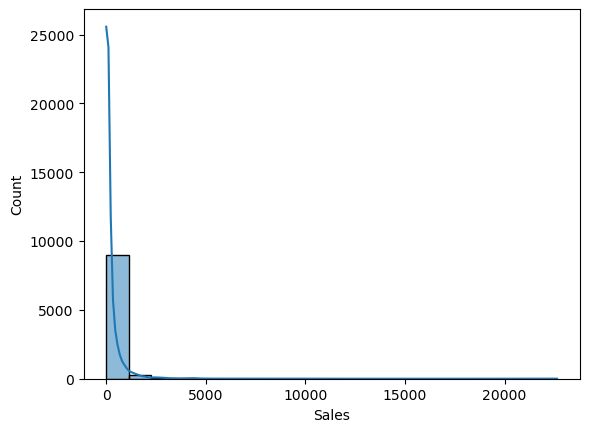

In [24]:
#Created a histogram for extreme values for sales
hist_sales = sns.histplot(df_sales_ndp['Sales'], bins = 20, kde = True)


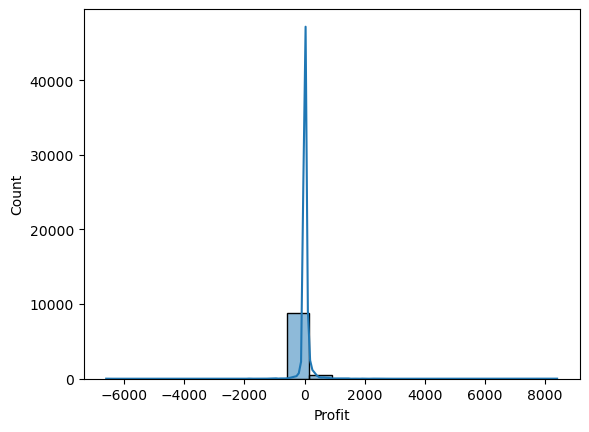

In [25]:
#Created a histogram for extreme values for sales
hist_profit = sns.histplot(df_sales_ndp['Profit'], bins = 20, kde = True)


In [28]:
df_sales_ndp.describe()

,Sales,Profit
count,9362.000000,9362.000000
mean,237.938486,29.287785
std,639.907637,241.409383
min,0.444000,-6599.978000
25%,17.940000,1.576200
50%,58.320000,8.713800
75%,218.352000,30.517200
max,22638.480000,8399.976000


# 4.Plotting Choropleth

In [32]:
# Creating a data frame with just the sales and region

plot_sales = df_sales_ndp[['Sales','State']]
plot_sales.head()

,Sales,State
0,261.9600,Kentucky
1,731.9400,Kentucky
2,14.6200,California
3,957.5775,Florida
4,22.3680,Florida


In [35]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = geo, 
    data = plot_sales,
    columns = ['State', 'Sales'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Sales by State").add_to(map)
folium.LayerControl().add_to(map)

map

In [42]:
map.save('plot_sales.html')

In [36]:
plot_profit = df_sales_ndp[['Region','Profit']]
plot_profit.head()

,Region,Profit
0,South,41.9136
1,South,219.5820
2,West,6.8714
3,South,-383.0310
4,South,2.5164


In [37]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = geo, 
    data = plot_profit,
    columns = ['Region', 'Profit'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Profit by Region").add_to(map)
folium.LayerControl().add_to(map)

map

In [43]:
map.save('plot_profit.html')

In [38]:
plot_region = df_sales_ndp[['Sales','Region']]
plot_region.head()

,Sales,Region
0,261.9600,South
1,731.9400,South
2,14.6200,West
3,957.5775,South
4,22.3680,South


In [39]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = geo, 
    data = plot_region,
    columns = ['Region', 'Sales'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Sales by Region").add_to(map)
folium.LayerControl().add_to(map)

map

In [44]:
map.save('plot_region.html')

In [40]:
plot_state = df_sales_ndp[['State','Profit']]
plot_state.head()

,State,Profit
0,Kentucky,41.9136
1,Kentucky,219.5820
2,California,6.8714
3,Florida,-383.0310
4,Florida,2.5164


In [41]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = geo, 
    data = plot_state,
    columns = ['State', 'Profit'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Profit by State").add_to(map)
folium.LayerControl().add_to(map)

map

In [45]:
map.save('plot_state.html')